In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import glob

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/'

In [3]:
all_pickles = sorted(glob.glob(os.path.join(input_dir, 'RBFOX2*.pickle')))
all_pickles

['/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/RBFOX2-0_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.0.9.flank25.pickle',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.0.9.flank25.pickle',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/RBFOX2-50_S13_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.0.9.flank25.pickle']

In [4]:
i = 0
data = pd.read_pickle(all_pickles[i])
data['kmer_results']['all'][6]['TCGATG']

Motif(freq1=24.0, freq2=77.0, delta=-0.2891608861579026)

In [5]:
def get_zscore_from_pickle(pickle_file, kmer='TCGATG'):
    regions = ['cds','three_prime_utrs','five_prime_utrs','proxintron500','distintron500','all']
    data = pd.read_pickle(pickle_file)
    zscores = defaultdict()
    for region in regions:
        fg, bg, delta = data['kmer_results'][region][6][kmer]
        zscores[region] = delta
    return pd.DataFrame(zscores, index=[os.path.basename(pickle_file).split('_')[0]])

In [6]:
merged = pd.DataFrame(columns = ['cds','three_prime_utrs','five_prime_utrs','proxintron500','distintron500','all'])

for pickle in all_pickles:
    merged = pd.concat([merged, get_zscore_from_pickle(pickle)])
# merged = merged.reindex(['ApoControl-0','ApoControl-50','ApoControl-1000','RBFOX2-0','RBFOX2-50','RBFOX2-1000'])
merged = merged.reindex(['RBFOX2-0','RBFOX2-50','RBFOX2-1000'])
merged

/projects/ps-yeolab4/bay001/anaconda2/envs/python2-essential/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,all,cds,distintron500,five_prime_utrs,proxintron500,three_prime_utrs
RBFOX2-0,-0.289161,1.191810,-0.703257,1.732063,-0.666677,-1.501144
RBFOX2-50,1.210016,0.279085,0.165988,1.414252,-1.501127,1.774601
RBFOX2-1000,2.585728,2.732921,2.326688,-0.666691,0.925743,0.202035


In [7]:
def order_index(row):
    if '-1000' in row['index']:
        return 3
    elif '-50' in row['index']:
        return 2
    elif '-0' in row['index']:
        return 1
    else:
        print("shouldn't happen.")
        return -1 
    
distintron = merged[['distintron500']]
distintron.loc[:,'region'] = 'Distal Intron'
distintron.loc[:,'order'] = 3
proxintron = merged[['proxintron500']]
proxintron.loc[:,'region'] = 'Proximal Intron'
proxintron.loc[:,'order'] = 4
utr5 = merged[['five_prime_utrs']]
utr5.loc[:,'region'] = '5 prime UTR'
utr5.loc[:,'order'] = 1
utr3 = merged[['three_prime_utrs']]
utr3.loc[:,'region'] = '3 prime UTR'
utr3.loc[:,'order'] = 2
cds = merged[['cds']]
cds.loc[:,'region'] = 'CDS'
cds.loc[:,'order'] = 5
total = merged[['all']]
total.loc[:,'region'] = 'Total'
total.loc[:,'order'] = 6

tidydf = pd.DataFrame(columns=['zscore','region','order'])
for df in [total, cds, distintron, proxintron, utr5, utr3]:
    df.columns = ['zscore', 'region', 'order']
    tidydf = pd.concat([tidydf, df])
    
tidydf.reset_index(inplace=True)
tidydf.loc[:,'ordered_index'] = tidydf.apply(order_index, axis=1)
tidydf.sort_values(by=['order', 'ordered_index'], inplace=True, )

tidydf

/home/bay001/anaconda2/envs/python2-essential/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/bay001/anaconda2/envs/python2-essential/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,zscore,region,order,ordered_index
12,RBFOX2-0,1.732063,5 prime UTR,1,1
13,RBFOX2-50,1.414252,5 prime UTR,1,2
14,RBFOX2-1000,-0.666691,5 prime UTR,1,3
15,RBFOX2-0,-1.501144,3 prime UTR,2,1
16,RBFOX2-50,1.774601,3 prime UTR,2,2
17,RBFOX2-1000,0.202035,3 prime UTR,2,3
6,RBFOX2-0,-0.703257,Distal Intron,3,1
7,RBFOX2-50,0.165988,Distal Intron,3,2
8,RBFOX2-1000,2.326688,Distal Intron,3,3
9,RBFOX2-0,-0.666677,Proximal Intron,4,1


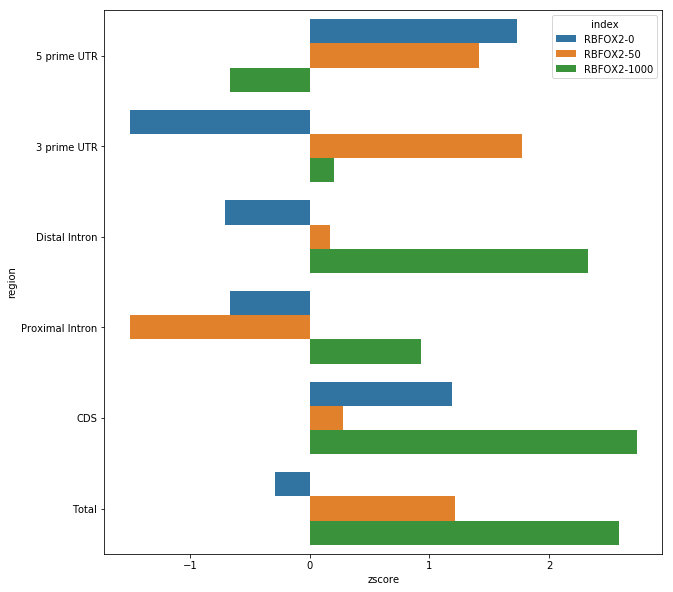

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x="zscore", y="region", hue="index", data=tidydf, )
fig.savefig(os.path.join(output_dir, 'kmer_enrichment_zscores_by_sample.svg'))

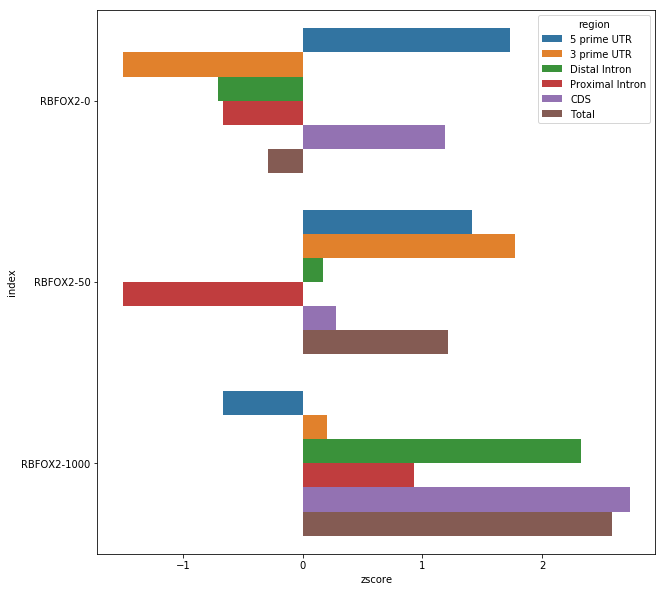

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x="zscore", y="index", hue="region", data=tidydf, )
fig.savefig(os.path.join(output_dir, 'kmer_enrichment_zscores_by_region.svg'))